In [1]:
# Imports...

import getpass
import h5py
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.markers as markers
import os
import json
import numpy as np
import pandas as pd

In [2]:
# Change presentation settings

%matplotlib inline

matplotlib.rcParams["figure.figsize"] = (8.0, 5.0)
matplotlib.rcParams["xtick.labelsize"] = 12
matplotlib.rcParams["ytick.labelsize"] = 12
matplotlib.rcParams["axes.spines.left"] = True
matplotlib.rcParams["axes.spines.bottom"] = True
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False
matplotlib.rcParams["axes.labelsize"] = 14
matplotlib.rcParams["legend.fontsize"] = 14
matplotlib.rcParams["axes.titlesize"] = 14

color_palette = {"Indigo": {
                    50: "#E8EAF6",
                    100: "#C5CAE9",
                    200: "#9FA8DA",
                    300: "#7986CB",
                    400: "#5C6BC0",
                    500: "#3F51B5",
                    600: "#3949AB",
                    700: "#303F9F",
                    800: "#283593",
                    900: "#1A237E"},
                 "Teal": {      
                    50: "#E0F2F1",
                    100: "#B2DFDB",
                    200: "#80CBC4",
                    300: "#4DB6AC",
                    400: "#26A69A",
                    500: "#009688",
                    600: "#00897B",
                    700: "#00796B",
                    800: "#00695C",
                    900: "#004D40"},
                 "Orange": {      
                    50: "#E0F2F1",
                    100: "#B2DFDB",
                    200: "#80CBC4",
                    300: "#4DB6AC",
                    400: "#26A69A",
                    500: "#009688",
                    600: "#00897B",
                    700: "#00796B",
                    800: "#00695C",
                    900: "#004D40"}
                }

line_styles = [(0, ()), (0, (1, 3)), (0, (3, 2))]

# Size of plots
plt.rcParams['figure.figsize'] = [20, 10]

In [4]:
# Get permission to access EOS (Insert your NICE password)

os.system("echo %s | kinit" % getpass.getpass())

········


0

In [5]:
PDs  = {1: 'BTagCSV',
        2: 'BTagMu',
        3: 'Charmonium',
        4: 'DisplacedJet',
        5: 'DoubleEG',
        6: 'DoubleMuon',
        7: 'DoubleMuonLowMass',
        8: 'FSQJets',
        9: 'HighMultiplicityEOF',
        10: 'HTMHT',
        11: 'JetHT',
        12: 'MET',
        13: 'MinimumBias',
        14: 'MuonEG',
        15: 'MuOnia',
        16: 'NoBPTX',
        17: 'SingleElectron',
        18: 'SingleMuon',
        19: 'SinglePhoton',
        20: 'Tau',
        21: 'ZeroBias'}

# Select PD
nPD = 18

In [6]:
legend = [{"name": 'pf_jets', "start": 0, "end": 776, "color": color_palette["Indigo"][100]},
          {"name": 'cal_jet_mets', "start": 777, "end": 944, "color": color_palette["Indigo"][300]},
          {"name": 'pho', "start": 945, "end": 1280, "color": color_palette["Indigo"][500]},
          {"name": 'muons', "start": 1281, "end": 1784, "color": color_palette["Indigo"][700]},
          {"name": 'pf_jets2', "start": 1785, "end": 1889, "color": color_palette["Indigo"][900]},
          {"name": 'pf_mets', "start": 1890, "end": 1917, "color": color_palette["Indigo"][200]},
          {"name": 'nvtx', "start": 1918, "end": 1924, "color": color_palette["Indigo"][400]},
          {"name": 'cal_jet_mets2', "start": 1925, "end": 2036, "color": color_palette["Indigo"][600]},
          {"name": 'sc', "start": 2037, "end": 2127, "color": color_palette["Indigo"][800]},
          {"name": 'cc', "start": 2128, "end": 2169, "color": color_palette["Orange"][100]},
          {"name": 'pho2', "start": 2170, "end": 2365, "color": color_palette["Orange"][300]},
          {"name": 'muons2', "start": 2366, "end": 2491, "color": color_palette["Orange"][500]},
          {"name": 'ebs', "start": 2492, "end": 2701, "color": color_palette["Orange"][700]},
          {"name": 'hbhef', "start": 2702, "end": 2764, "color": color_palette["Orange"][900]},
          {"name": 'presh', "start": 2765, "end": 2806, "color": color_palette["Orange"][400]}]

In [7]:
data_directory = "/eos/cms/store/user/fsiroky/consistentlumih5/"
label_file = "./JetHT.json"

In [8]:
def get_file_list(directory, pds, npd, typeof, extension):
    files = []
    parts = ["C", "D", "E", "F", "G", "H"]
    for p in parts:
        files.append("%s%s_%s_%s%s" % (directory, pds[npd], p, typeof, extension))
    return files

files = get_file_list(data_directory, PDs, nPD, "background", ".h5")
files = files + get_file_list(data_directory, PDs, nPD, "signal", ".h5")

In [9]:
# Load good and bad jets

def get_data(files):
    readout = np.empty([0,2813])
    
    for file in files:
        jet = file.split("/")[-1][:-3]
        print("Reading: %s" % jet)
        try:
            h5file = h5py.File(file, "r")
            readout = np.concatenate((readout, h5file[jet][:]), axis=0)
        except OSError as error:
            print("This Primary Dataset doesn't have %s. %s" % (jet, error))
            continue

    return readout

data = pd.DataFrame(get_data(files))

Reading: SingleMuon_C_background
Reading: SingleMuon_D_background
Reading: SingleMuon_E_background
Reading: SingleMuon_F_background
This Primary Dataset doesn't have SingleMuon_F_background. Unable to open file (Unable to open file: name = '/eos/cms/store/user/fsiroky/consistentlumih5/singlemuon_f_background.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)
Reading: SingleMuon_G_background
Reading: SingleMuon_H_background
Reading: SingleMuon_C_signal
Reading: SingleMuon_D_signal
Reading: SingleMuon_E_signal
Reading: SingleMuon_F_signal
This Primary Dataset doesn't have SingleMuon_F_signal. Unable to open file (Unable to open file: name = '/eos/cms/store/user/fsiroky/consistentlumih5/singlemuon_f_signal.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)
Reading: SingleMuon_G_signal
Reading: SingleMuon_H_signal


In [10]:
data["run"] = data[2807].astype(int)
data["lumi"] = data[2808].astype(int)
data["inst_lumi"] = data[2809].astype(float)

In [11]:
# Drop unnecessary meta data
data.drop([2807, 2808, 2809, 2810, 2811, 2812], axis=1, inplace=True)

# Sort by runID and then by lumiID
data = data.sort_values(["run", "lumi"], ascending=[True,True])

# Reset index
data = data.reset_index(drop=True)  

In [12]:
data.shape

(154818, 2810)

In [13]:
# Apply labels
output_json = json.load(open(label_file))

def json_checker(json_file, orig_runid, orig_lumid):
    try:
        for i in json_file[str(int(orig_runid))]:
            if orig_lumid >= i[0] and orig_lumid <= i[1]:
                return 0
    except KeyError:
        pass
    return 1

def add_flags(sample):
    return json_checker(output_json, sample["run"], sample["lumi"])

data["label"] = data.apply(add_flags, axis=1)

In [14]:
data_orig = data

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

In [16]:
# Normalize the data
data = data_orig
scaler = StandardScaler()
data.iloc[:, 0:2806] = scaler.fit_transform(data.iloc[:, 0:2806].values)

In [17]:
X = data.iloc[:, 0:2806]
y = data["label"]
luminosity = data["inst_lumi"]

X_good = X[y == 0]
X_bad = X[y == 1]
y_good = y[y == 0]
y_bad = y[y == 1]

total_count = len(X)
good_count = len(X_good)
bad_count = len(X_bad)

print("Number of inliers in dataset:", good_count, good_count/total_count)
print("Number of anomalies in the dataset:", bad_count, bad_count/total_count)

Number of inliers in dataset: 153078 0.9887609967833197
Number of anomalies in the dataset: 1740 0.01123900321668023


In [18]:
print(len(X[:len(X) // 10][y == 1]) / len(X_bad))

0.3005747126436782


/opt/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [19]:
variance = np.var(X, axis=1)

In [20]:
# Plot lumi vs error
def plot_lumi_error(y, scores, threshold=None):
    fig, ax = plt.subplots()

    plt.plot(np.array([i for i in range(len(scores))])[y == 0],
             scores[y == 0],
             color=color_palette["Teal"][300],
             linestyle='',
             ms=2,
             marker='o',
             label="Outlier")

    plt.plot(np.array([i for i in range(len(scores))])[y == 1],
             scores[y == 1],
             color=color_palette["Indigo"][700],
             linestyle='',
             ms=2,
             marker='o',
             label="Inlier")

    ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
    
    ax.set_yscale("log")
    plt.ylabel("Score")
    plt.xlabel("Lumisection #")
    plt.show();

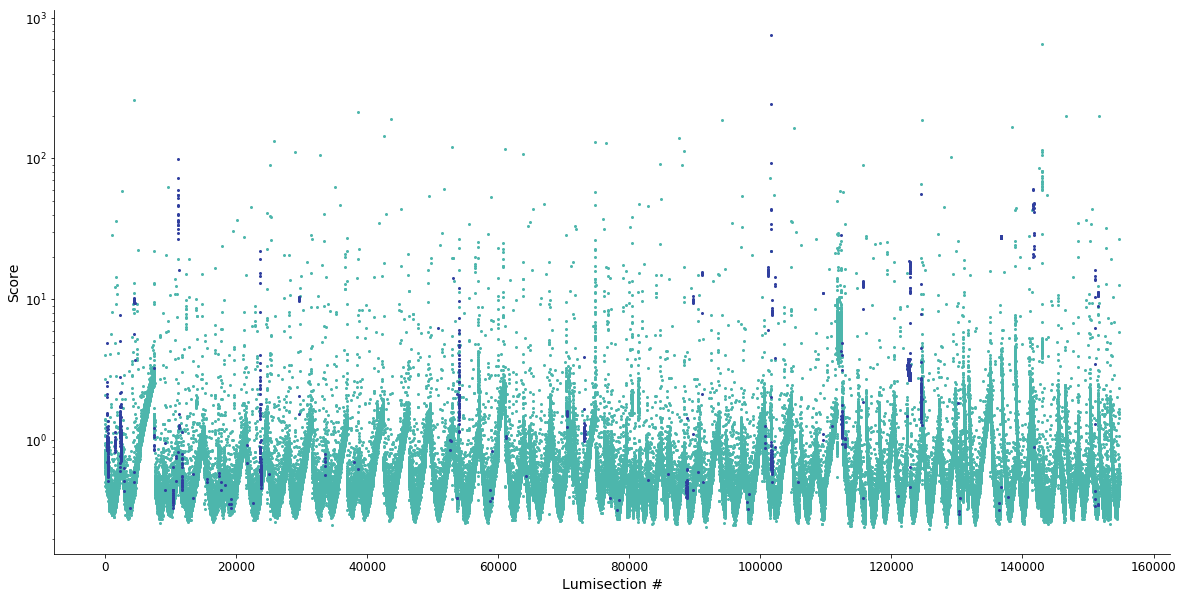

In [21]:
# Plot lumi vs MS
plot_lumi_error(y, variance)

0.16997936937053462


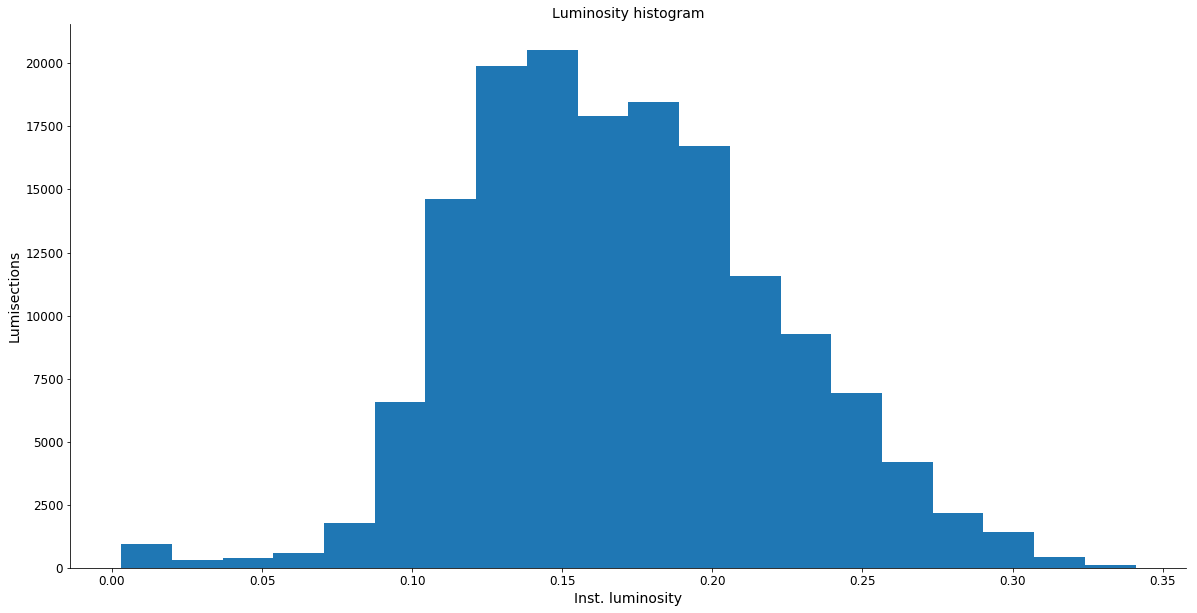

In [22]:
plt.hist(data['inst_lumi'], bins=20)
print(np.mean(data['inst_lumi']))
plt.title("Luminosity histogram")
plt.xlabel("Inst. luminosity")
plt.ylabel("Lumisections")
plt.show()

In [23]:
def pred_vs_feature(y_val, x_val, y_class, y_name="", x_name="", selected=[], linear=False,
                    x_lim=None, y_lim=None, title=""):
    '''
    Plots two arbitrary values agains each other.
    '''
    df = pd.DataFrame({'y_val': y_val,
                       'x_val': x_val,
                       'y_class': y_class})

    groups = df.groupby('y_class')
    fig, ax = plt.subplots()

    for name, group in groups:
        ax.plot(group.x_val, 
                group.y_val,
                color="red" if name == 1 else "g",
                marker='o',
                ms=2,
                linestyle='',
                label= "Bad" if name == 1 else "Good")

    for i in selected:
        ax.plot(x_val[i],
                y_val[i],
                color="green",
                marker='o',
                ms=4,
                linestyle='')
                 
    ax.legend()
    if not linear:
        ax.set_yscale('log')
    if x_lim:
        plt.xlim(x_lim[0], x_lim[1])
    if y_lim:
        plt.ylim(y_lim[0], y_lim[1])
    plt.grid()
    plt.ylabel(y_name)
    plt.xlabel(x_name)
    plt.title(title)
    plt.show()

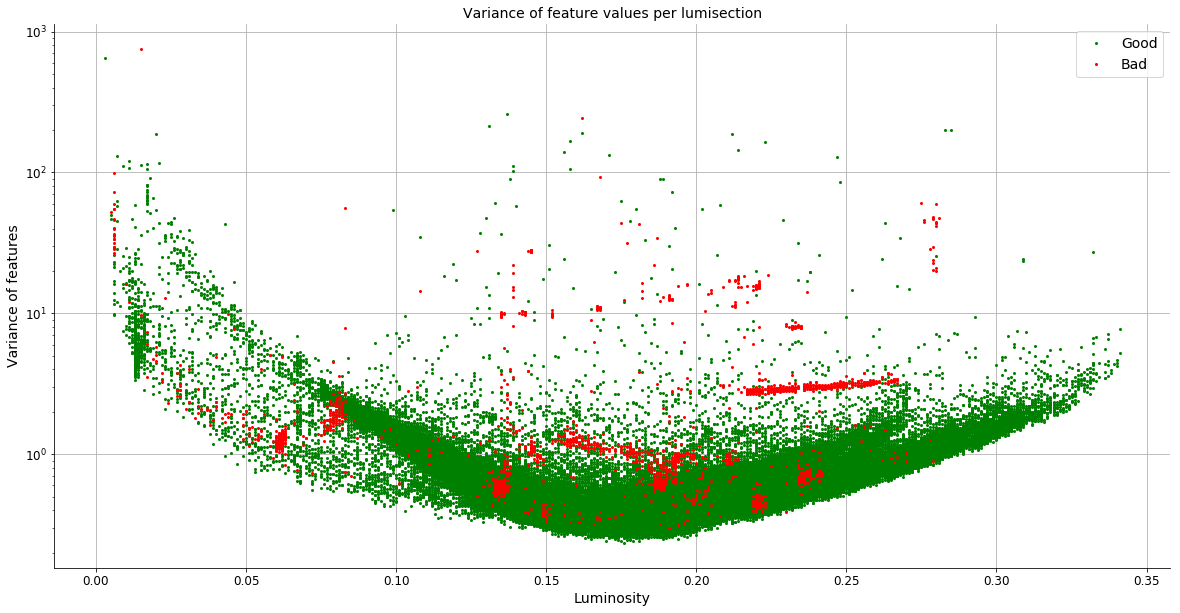

In [25]:
pred_vs_feature(variance, luminosity, y, "Variance of features", "Luminosity", title="Variance of feature values per lumisection")

In [28]:
STEP = 0.05
#SAMPLE_SIZE = 2377
SAMPLE_SIZE=50

features_good = []
features_bad = []

good_mean_mean = []
good_mean_median = []
bad_mean_mean = []
bad_mean_median = []
good_variance = []
bad_variance = []

def plot_mean_features(X, y):
    
    lower_bounds = np.arange(0, 0.35, STEP)
    y_old = y
    
    for i in lower_bounds:
        data_filtered = data[(data['inst_lumi'] >= i) & (data['inst_lumi'] <= i+STEP)]
        y = y_old[(data['inst_lumi'] >= i) & (data['inst_lumi'] <= i+STEP)]

        range_title = "Luminosity range: " + str(i) + " - " + str(i+STEP)
        print(range_title)
        
        print("Dataset size:", len(data_filtered))
        X = data_filtered.iloc[:, 0:2806]
        X_good = X[y == 0]
        X_bad = X[y == 1]
        print("Good samples:", len(X_good))
        print("Bad samples:", len(X_bad))
        
        sample_good = X_good.sample(SAMPLE_SIZE)        
        good_mean = abs(np.mean(sample_good, axis=0))
        good_median = abs(np.median(sample_good, axis=0))
        good_variance.append(np.median(np.var(sample_good, axis=1)))
        
        if len(X_bad) > 0:
            bad_sample = X_bad.sample(SAMPLE_SIZE)
            bad_mean = abs(np.mean(bad_sample, axis=0))
            bad_median = abs(np.median(bad_sample, axis=0))
            bad_mean_mean.append(np.mean(bad_mean))
            bad_mean_median.append(np.mean(bad_median))
            bad_variance.append(np.median(np.var(bad_sample, axis=1)))
        else:
            bad_mean_mean.append(0)
            bad_mean_median.append(0)
            bad_variance.append(0)
            
        good_mean_mean.append(np.mean(good_mean))
        good_mean_median.append(np.mean(good_median))
    
        fig, (ax1, ax2) = plt.subplots(2, sharex=True)
        
        if len(X_bad) > 0:
            ax1.plot(np.array([i for i in range(len(bad_mean))]),
                     bad_mean,
                     color="r",
                     linestyle='-',
                     ms=2,
                     alpha=0.5,
                     marker='o',
                     label="Bad")
        
        ax1.plot(np.array([i for i in range(len(good_mean))]),
                 good_mean,
                 color="g",
                 linestyle='-',
                 ms=2,
                 alpha=0.5,
                 marker='o',
                 label="Good")
        
        if len(X_bad) > 0:
            ax2.plot(np.array([i for i in range(len(bad_median))]),
                     bad_median,
                     color="r",
                     linestyle='-',
                     ms=2,
                     alpha=0.5,
                     marker='o',
                     label="Bad")

        ax2.plot(np.array([i for i in range(len(good_median))]),
                 good_median,
                 color="g",
                 linestyle='-',
                 alpha=0.5,
                 ms=2,
                 marker='o',
                 label="Good")
        
        ax1.set_title(range_title + ", mean")
        ax2.set_title(range_title + ", median")
        
#         plt.xlim([0, 100])
        ax1.set_ylim([0, 20])
        ax2.set_ylim([0, 20])
        
        ax1.legend()
        ax2.legend()
        plt.ylabel("Value")
        plt.xlabel("Feature #")
        plt.show()

## Plots showing mean and median of each feature across randomly chosen 100 good and 100 bad lumisections (separately) in luminosity ranges

Luminosity range: 0.0 - 0.05
Dataset size: 1516
Good samples: 1442
Bad samples: 74


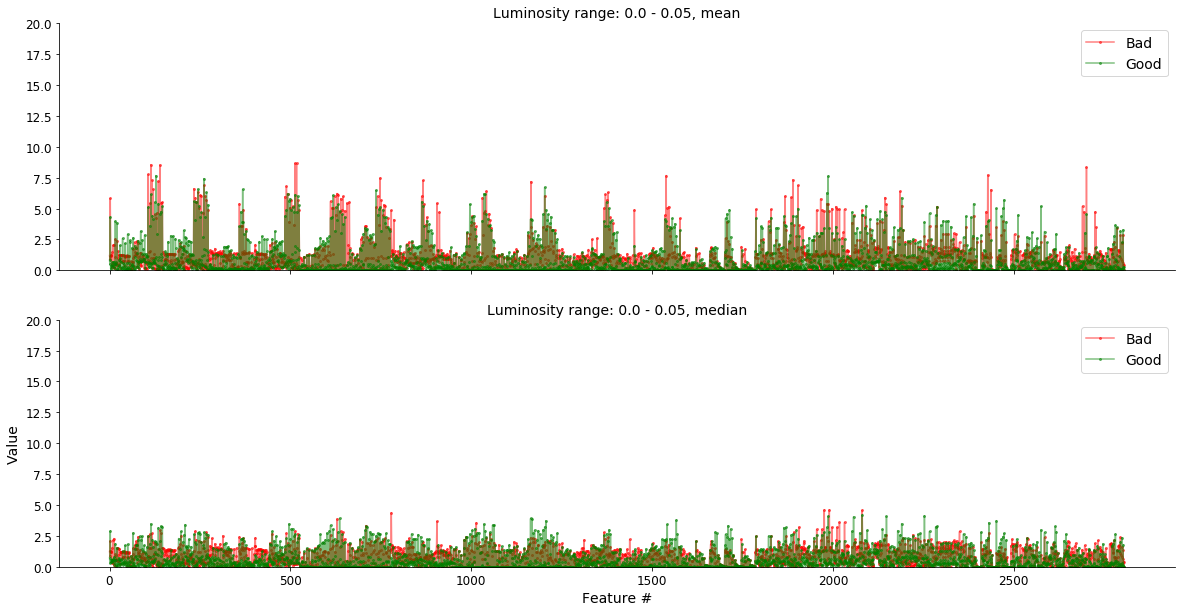

Luminosity range: 0.05 - 0.1
Dataset size: 6067
Good samples: 5820
Bad samples: 247


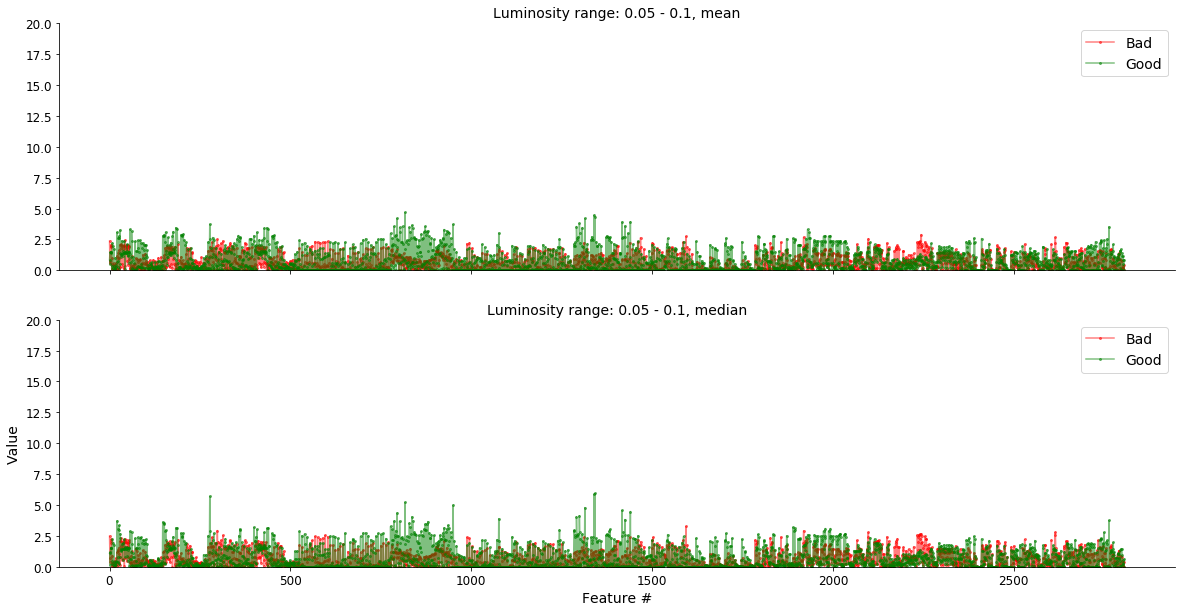

Luminosity range: 0.1 - 0.15
Dataset size: 50680
Good samples: 50401
Bad samples: 279


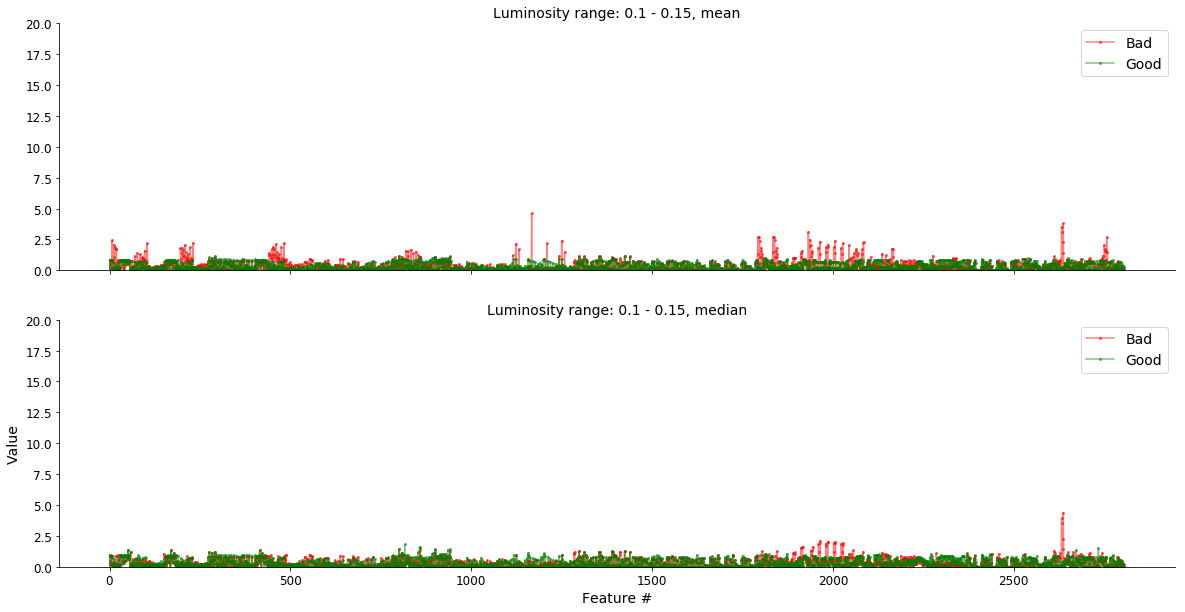

Luminosity range: 0.15 - 0.2
Dataset size: 55149
Good samples: 54672
Bad samples: 477


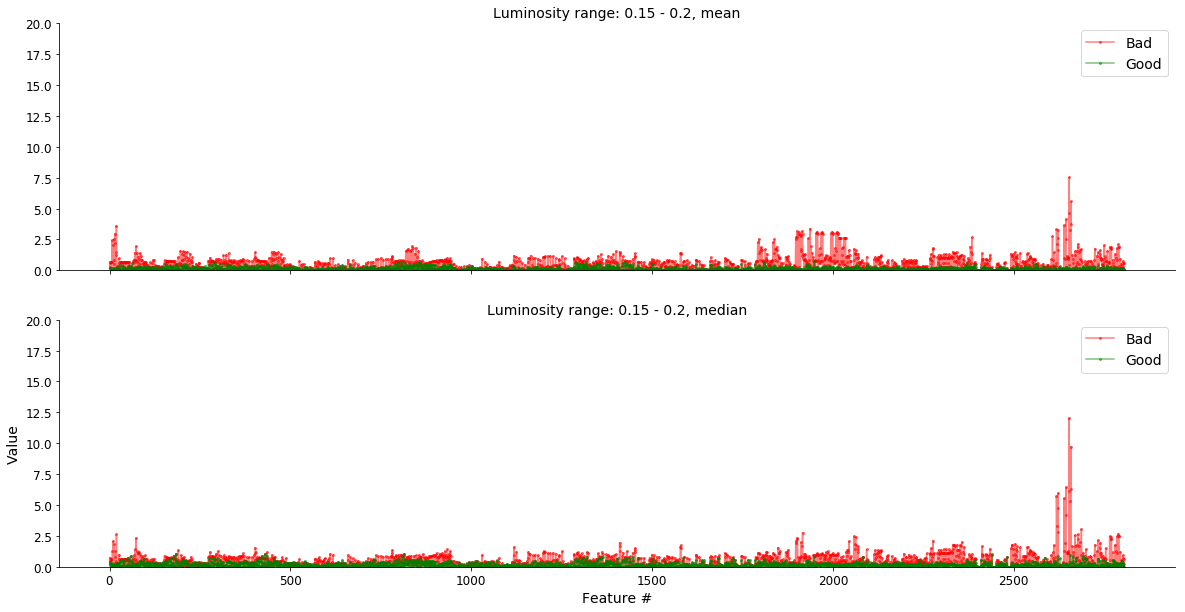

Luminosity range: 0.2 - 0.25
Dataset size: 30737
Good samples: 30190
Bad samples: 547


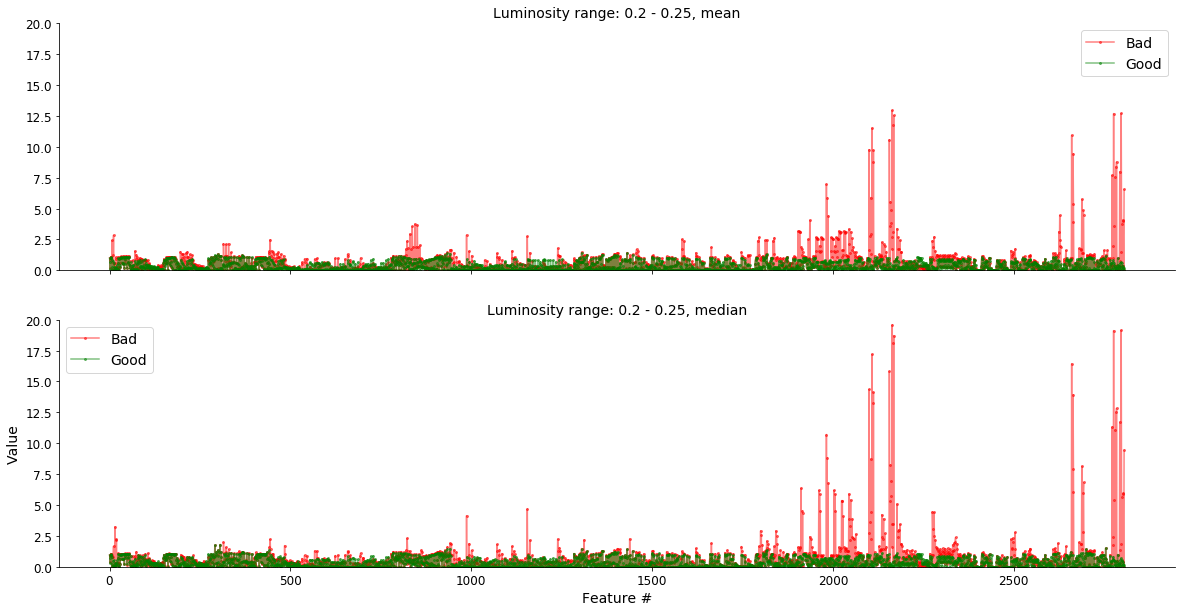

Luminosity range: 0.25 - 0.3
Dataset size: 9953
Good samples: 9829
Bad samples: 124


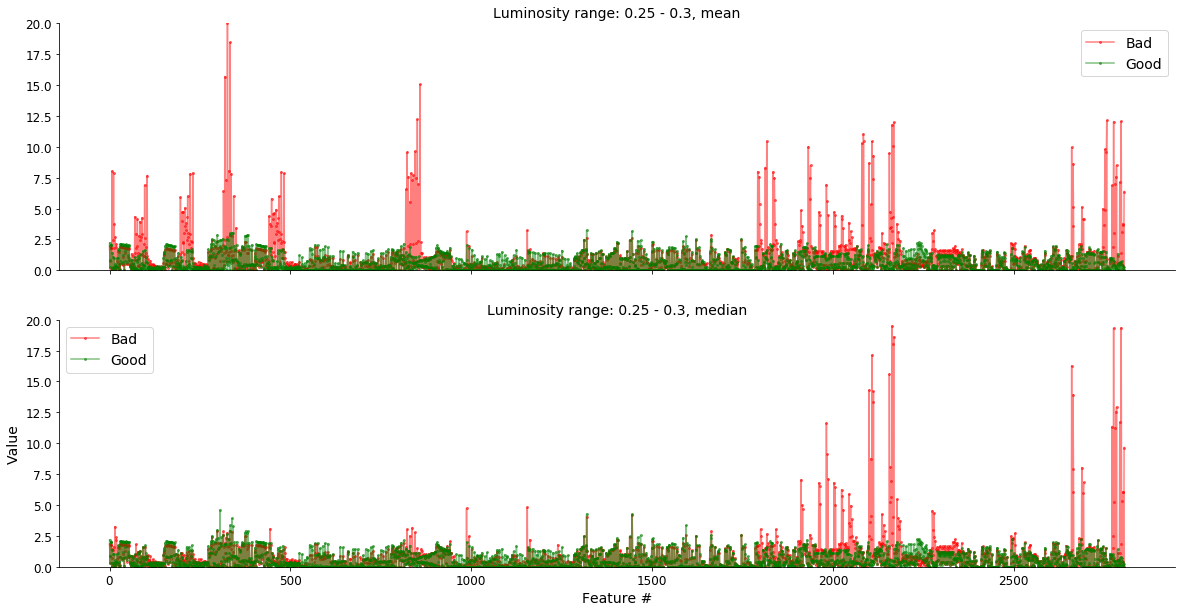

Luminosity range: 0.3 - 0.35
Dataset size: 1150
Good samples: 1150
Bad samples: 0


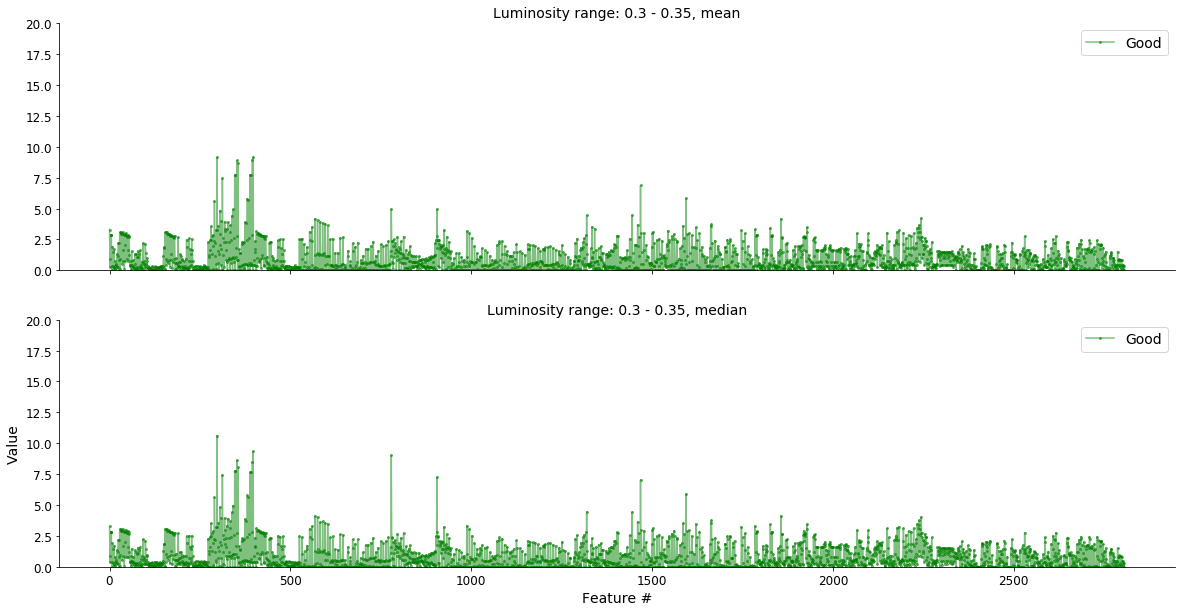

In [29]:
plot_mean_features(X, y)

In [30]:
def plot_means():
    matplotlib.rcParams["figure.figsize"] = (15, 10)

    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    ax1.bar(np.arange(0, 0.35, STEP),
           good_mean_mean,
           align='edge',
           width=0.05,
           color='g',
           alpha=0.5,
           label="Good")

    ax1.bar(np.arange(0, 0.35, STEP),
           bad_mean_mean,
           align='edge',
           width=0.05,
           color='r',
           alpha=0.5,
           label="Bad")

    ax1.set_ylabel("Mean mean")
    ax1.set_ylim((0, 3))
    ax1.set_title('Mean mean of features')
    ax1.grid()
    ax1.legend()

    ax2.bar(np.arange(0, 0.35, STEP),
           good_mean_median,
           align='edge',
           width=0.05,
           color='g',
           alpha=0.5,
           label="Good")

    ax2.bar(np.arange(0, 0.35, STEP),
           bad_mean_median,
           align='edge',
           width=0.05,
           color='r',
           alpha=0.5,
           label="Bad")

    ax2.set_ylim((0, 3))
    ax2.set_ylabel("Mean median")
    ax2.set_title('Mean median of features')
    ax2.legend()
    
    plt.xlabel('Luminosity')
    ax2.grid()
    plt.show()

## Mean of above values

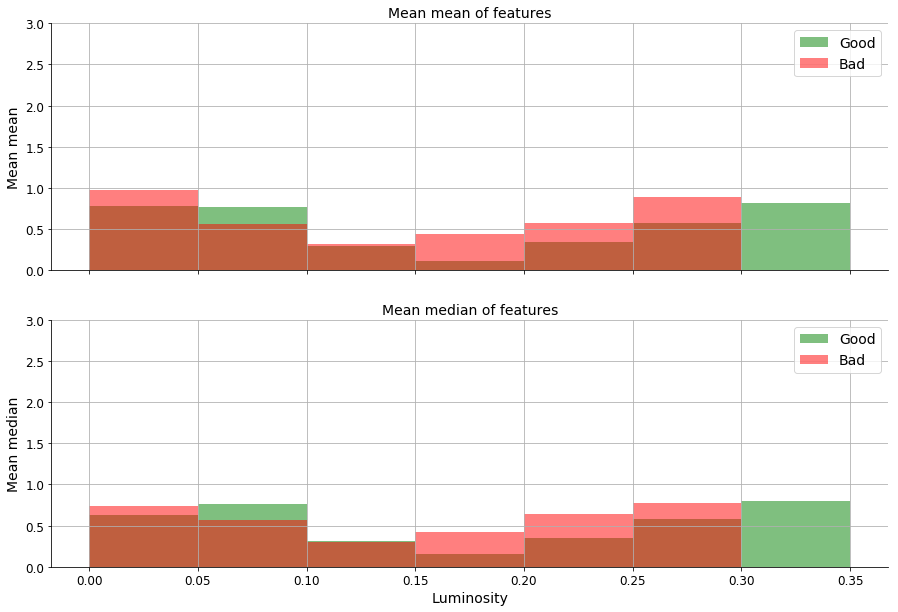

In [31]:
plot_means()

In [32]:
def plot_means_difference():
    matplotlib.rcParams["figure.figsize"] = (15, 10)

    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    ax1.bar(np.arange(0, 0.35, STEP),
           np.asarray(bad_mean_mean) - np.asarray(good_mean_mean),
           align='edge',
           width=0.05,
           color='b',
           alpha=0.5)

    ax1.set_ylabel("Difference")
    ax1.set_ylim((-2, 2))
    ax1.set_title("Difference between bad and good means of means")
    ax1.grid()
    ax1.legend()

    ax2.bar(np.arange(0, 0.35, STEP),
           np.asarray(bad_mean_median) - np.asarray(good_mean_median),
           align='edge',
           width=0.05,
           color='b',
           alpha=0.5)

    ax2.set_ylim((-2, 2))
    ax2.set_ylabel("Difference")
    ax2.set_title('Difference between bad and good means of medians')
    ax2.legend()
    
    plt.xlabel('Luminosity')
    ax2.grid()
    plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


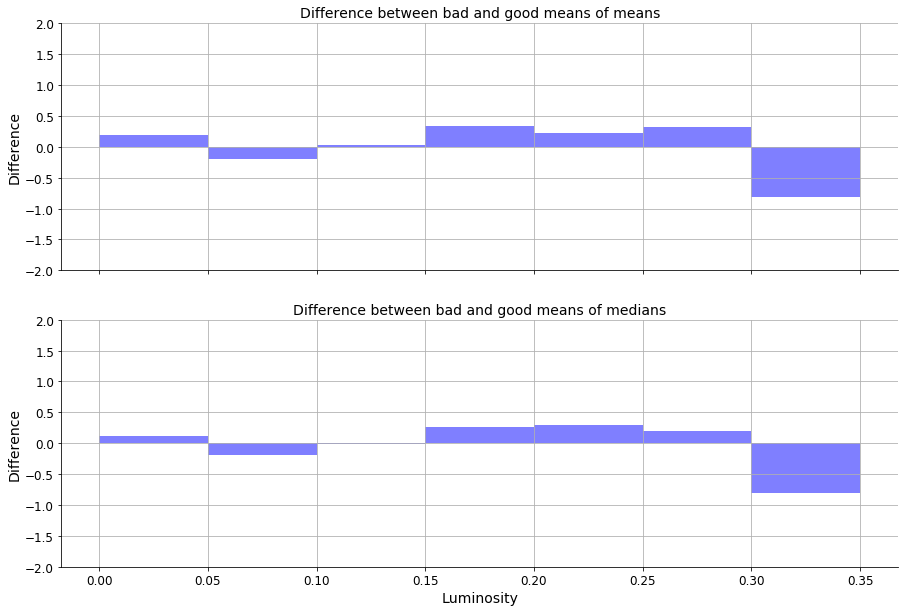

In [33]:
plot_means_difference()

In [34]:
def plot_var():
    matplotlib.rcParams["figure.figsize"] = (15, 10)

    fig, ax1 = plt.subplots()
    ax1.bar(np.arange(0, 0.35, STEP),
           good_variance,
           align='edge',
           width=0.05,
           color='g',
           alpha=0.5,
           label="Good")

    

    ax1.bar(np.arange(0, 0.35, STEP),
           bad_variance,
           align='edge',
           width=0.05,
           color='r',
           alpha=0.5,
           label="Bad")

    ax1.set_ylabel("Median variance of features")
    #ax1.set_ylim((-2, 2))
    ax1.set_title("Median variance of feature values")
    ax1.grid()
    ax1.legend()
    
    plt.xlabel('Luminosity')
    plt.show()

In [35]:
good_variance

[5.7517436687928587,
 1.8730548387448569,
 0.5469288337363245,
 0.35268663586801646,
 0.54741364714718155,
 0.96269068187308193,
 1.9985471923462073]

In [36]:
bad_variance

[3.2177776114101397,
 1.4776422866727483,
 0.67652049452681529,
 1.024888206325699,
 2.8930323710589398,
 3.2362265706763962,
 0]

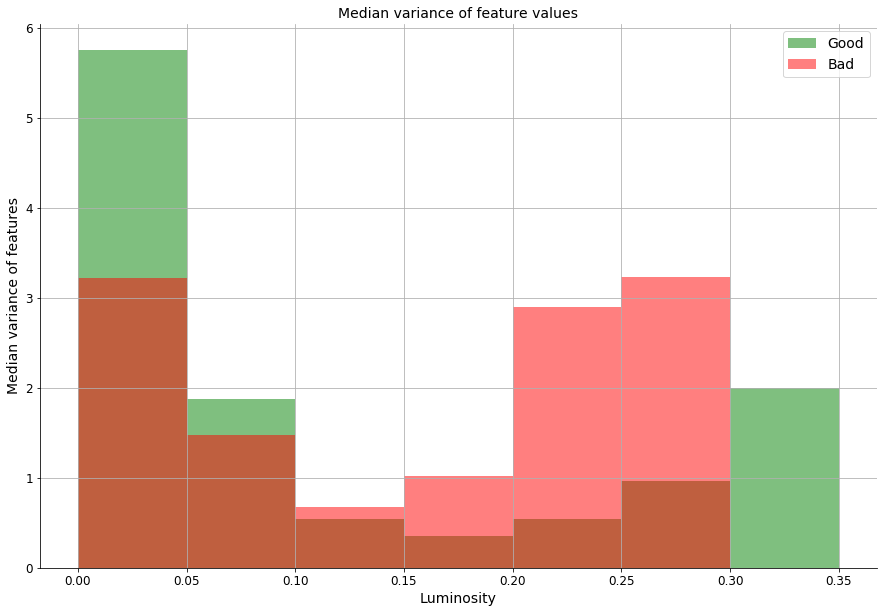

In [37]:
plot_var()

In [38]:
def pred_vs_feature3(y_val, x_val, y_class, y_name="", x_name="", selected=[], linear=False,
                    x_lim=None, y_lim=None, title=""):

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
    
    ax = [ax1, ax2, ax3]
    ax1.set_title(title)
    
    for i in range(3):
        df = pd.DataFrame({'y_val': y_val[i],
                           'x_val': x_val,
                           'y_class': y_class})

        groups = df.groupby('y_class')

        for name, group in groups:
            ax[i].plot(group.x_val, 
                    group.y_val,
                    color="r" if name == 1 else "g",
                    marker='o',
                    ms=2,
                    linestyle='',
                    label= "Bad" if name == 1 else "Good")

        for i in selected:
            ax[i].plot(x_val[i],
                    y_val[i],
                    color="g",
                    marker='o',
                    ms=4,
                    linestyle='')

        ax[i].legend()
        if not linear:
            ax[i].set_yscale('log')
        if x_lim:
            ax[i].set_xlim(x_lim[0], x_lim[1])
        if y_lim:
            ax[i].set_ylim(y_lim[0], y_lim[1])
        ax[i].set_ylabel(y_name[i])
        ax[i].grid()
    plt.xlabel(x_name)
   
    plt.show()

In [39]:
def plot_var():
    for var in legend:
            print(var['name'])

            X_var = X.iloc[:, var['start'] : var['end']+1]

            mean = np.mean(X_var, axis=1)
            mean_abs = np.mean(np.abs(X_var), axis=1)
            sd = np.std(X_var, axis=1)


            pred_vs_feature3([mean, mean_abs, sd],
                            luminosity, 
                            y, 
                            ["Mean", 
                             "Mean abs", 
                             "Standard deviation"],
                            "Luminosity",
                            title=var['name'],
                            x_lim=(0, 0.35),
                            y_lim=(-5, 5),
                            linear=True)


## Plots of mean, mean abs and sd of features for each variable subset

pf_jets


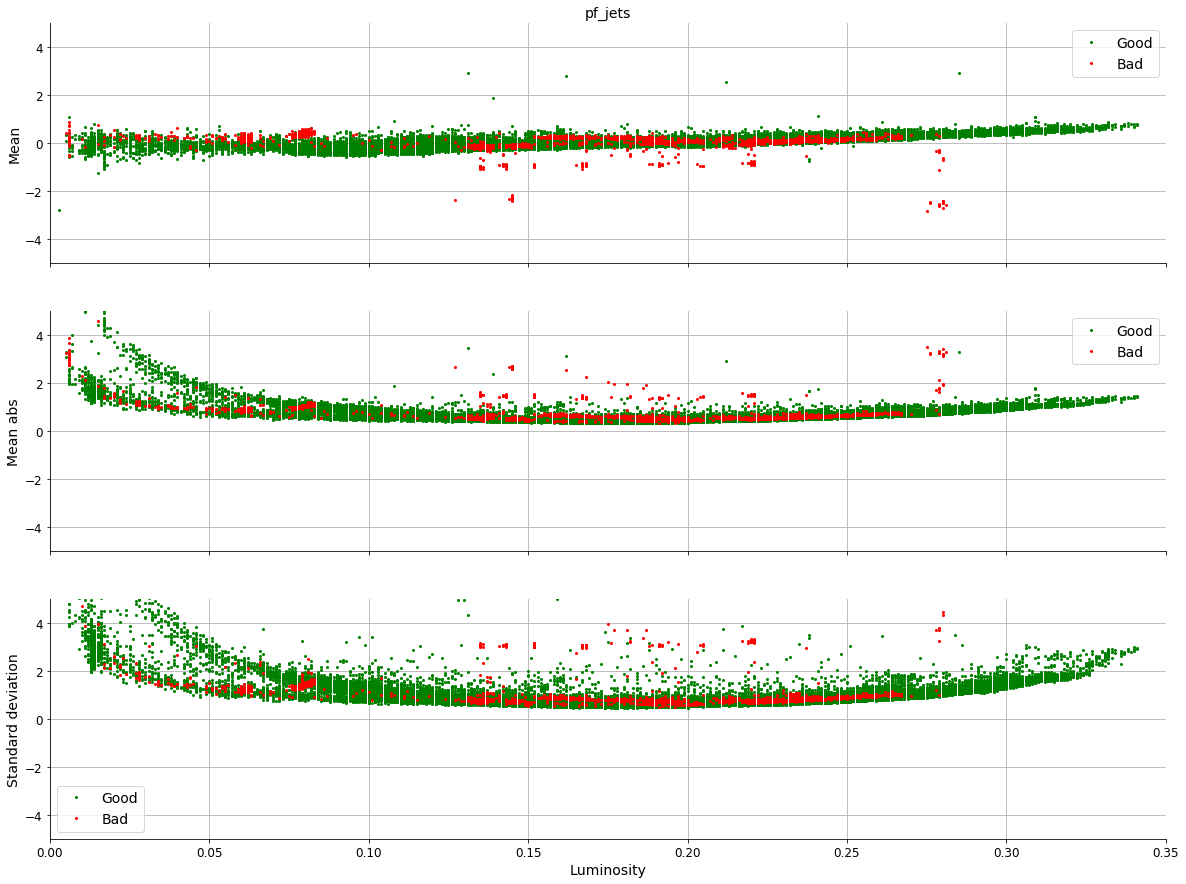

cal_jet_mets


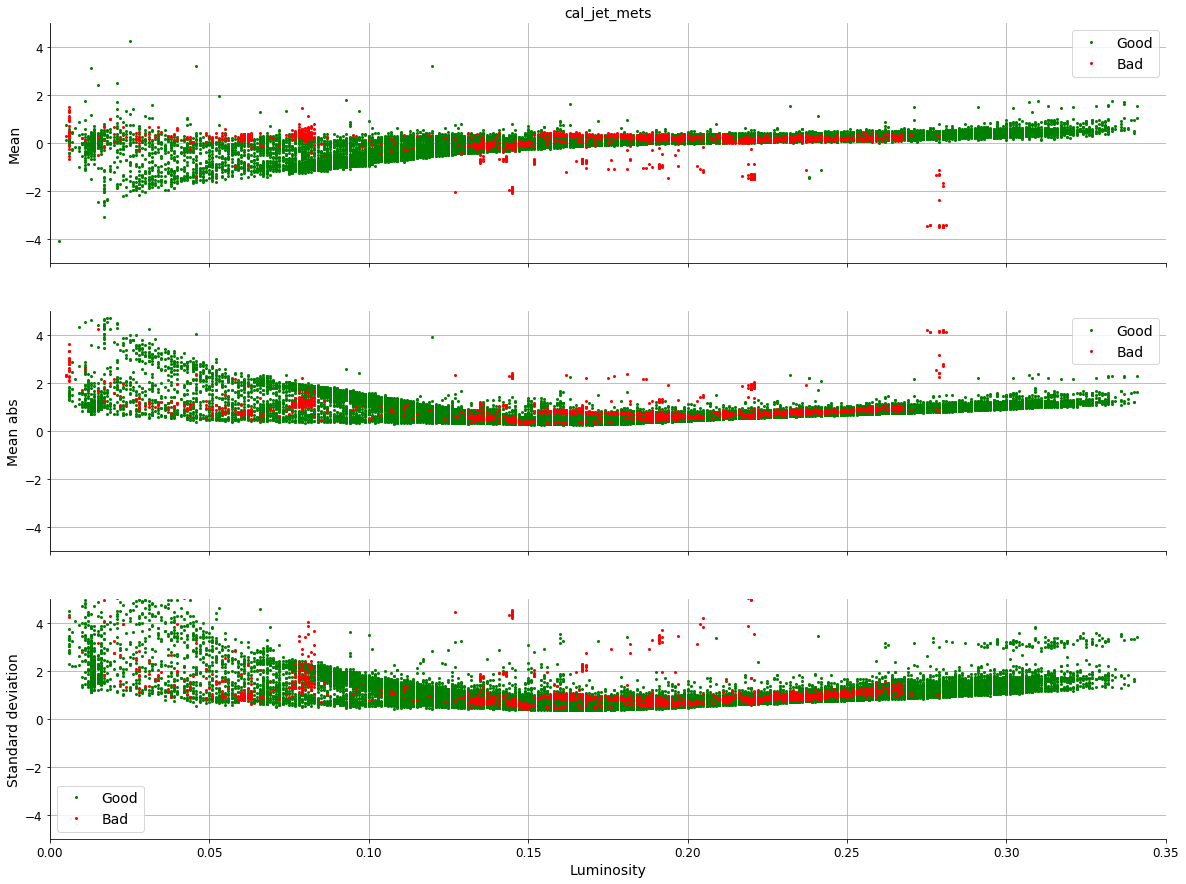

pho


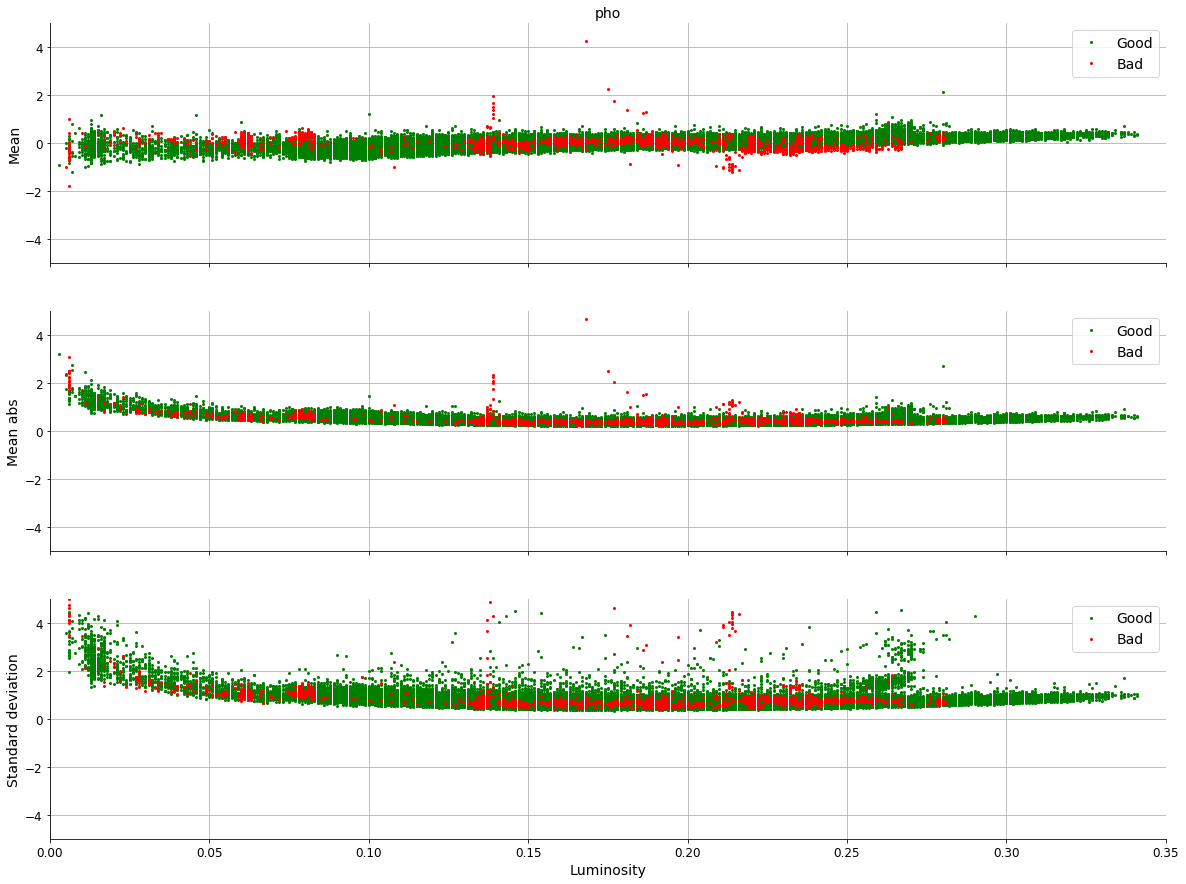

muons


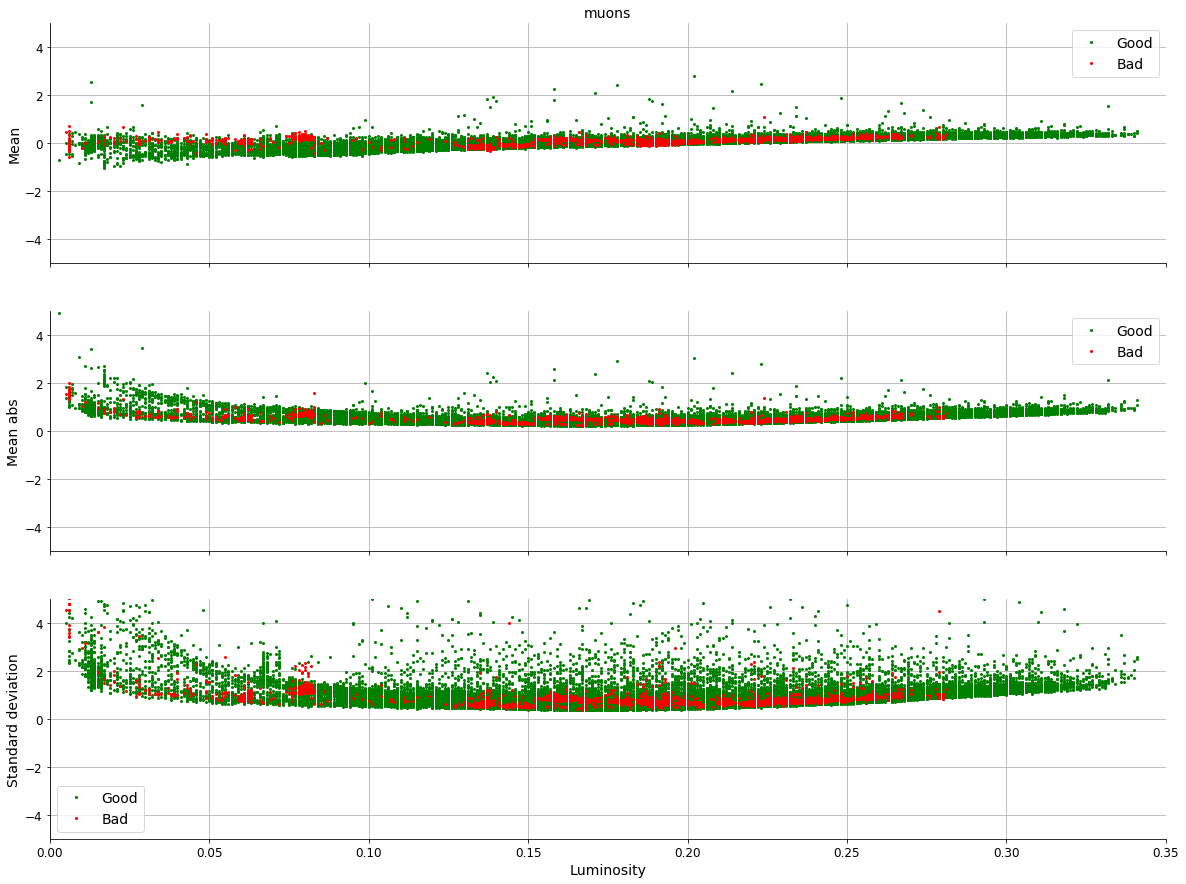

pf_jets2


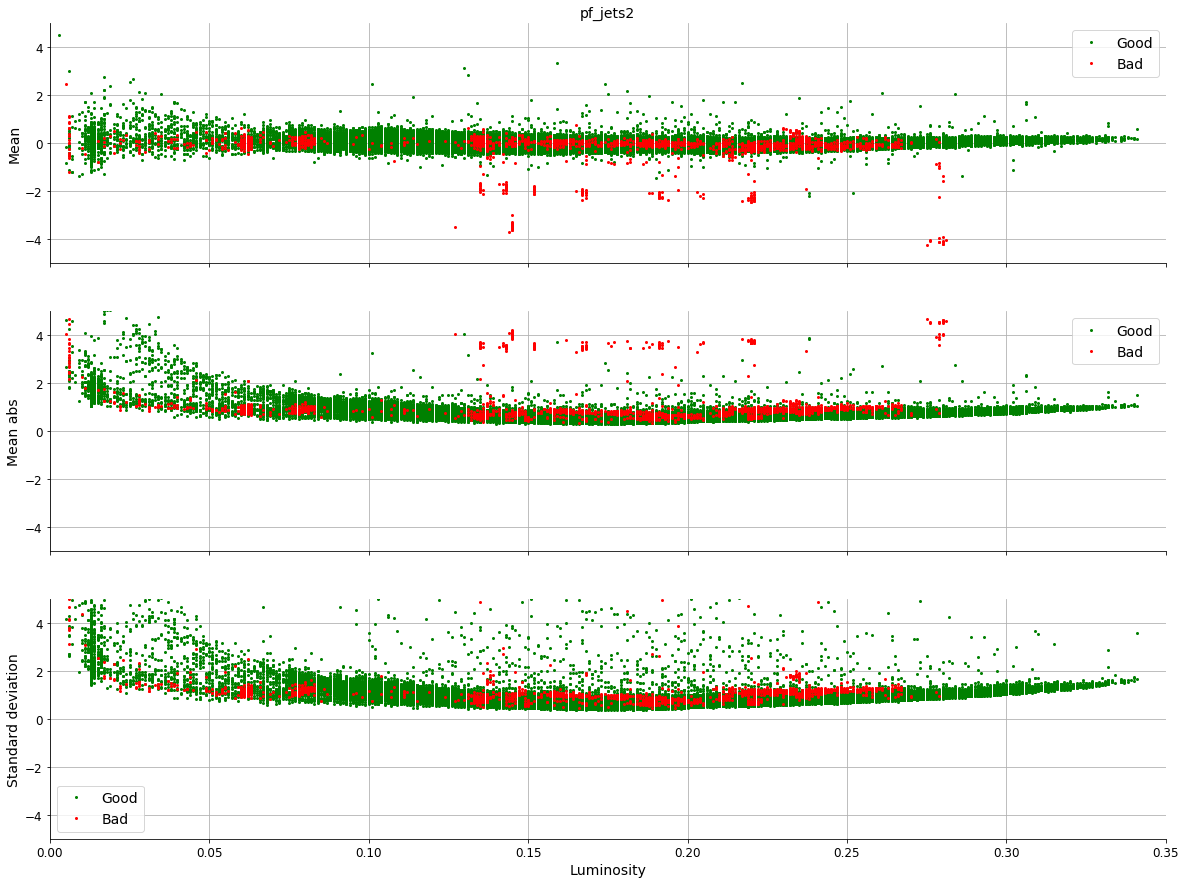

pf_mets


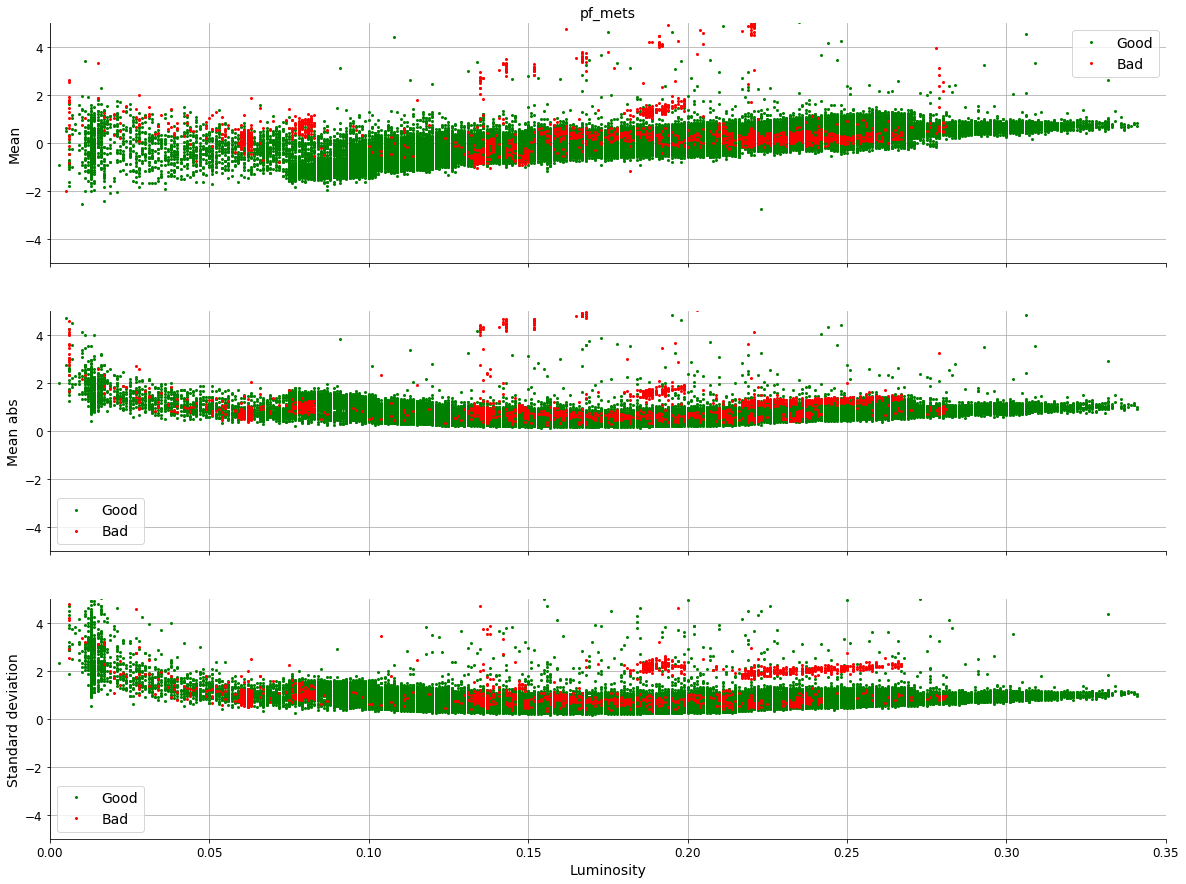

nvtx


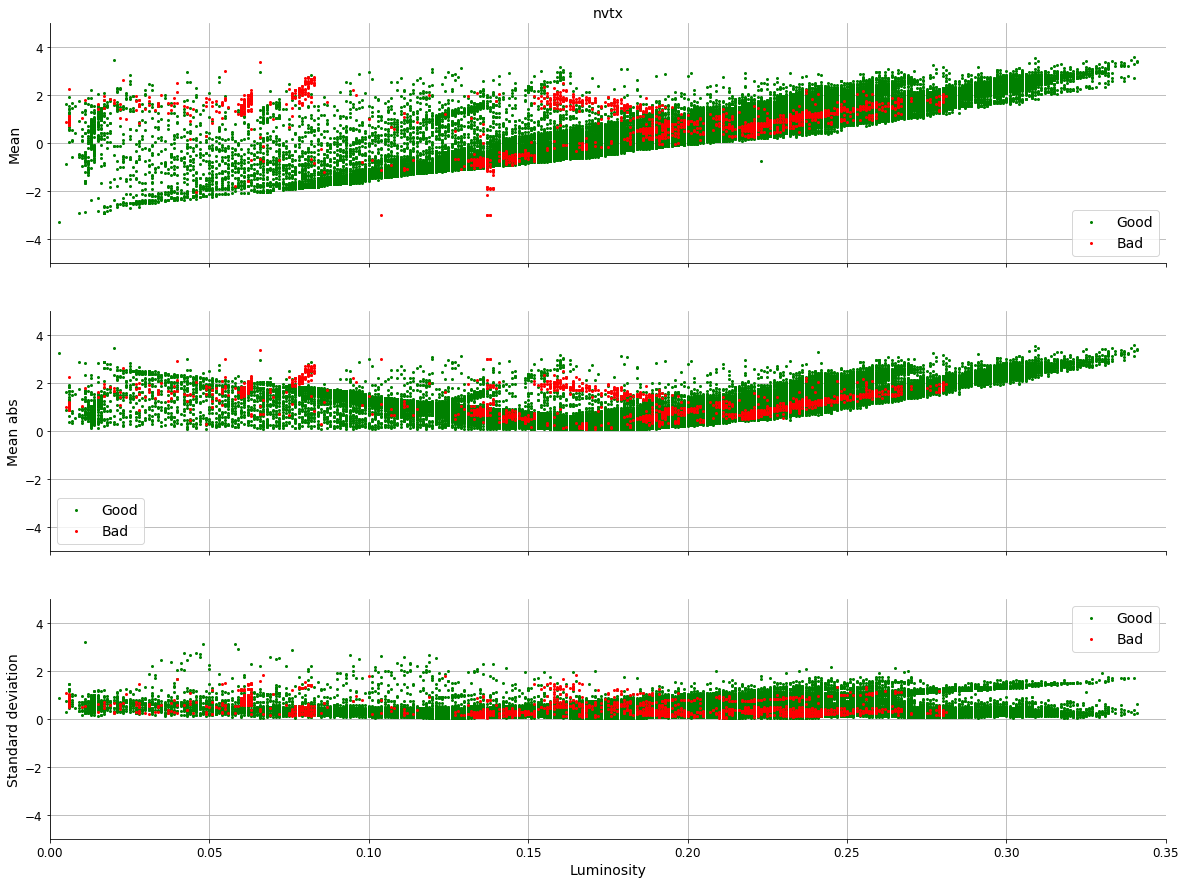

cal_jet_mets2


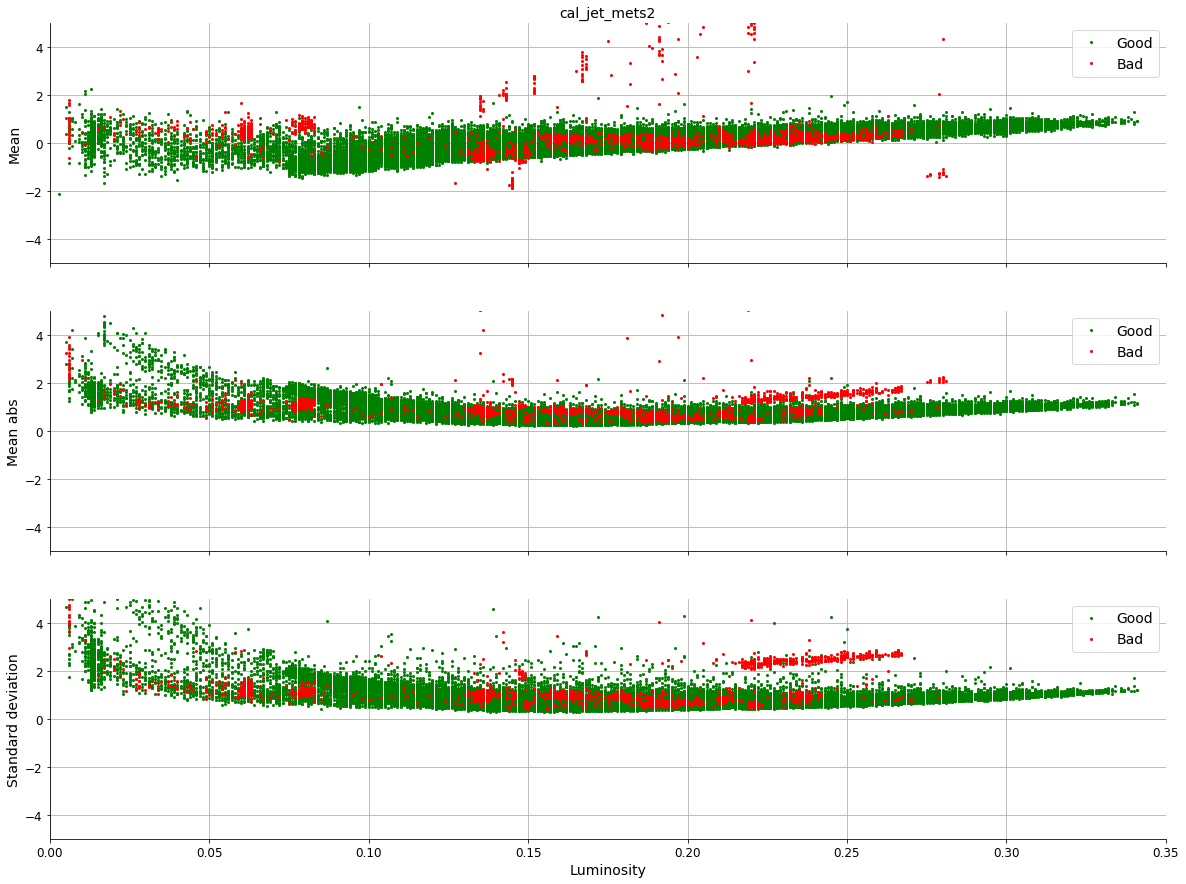

sc


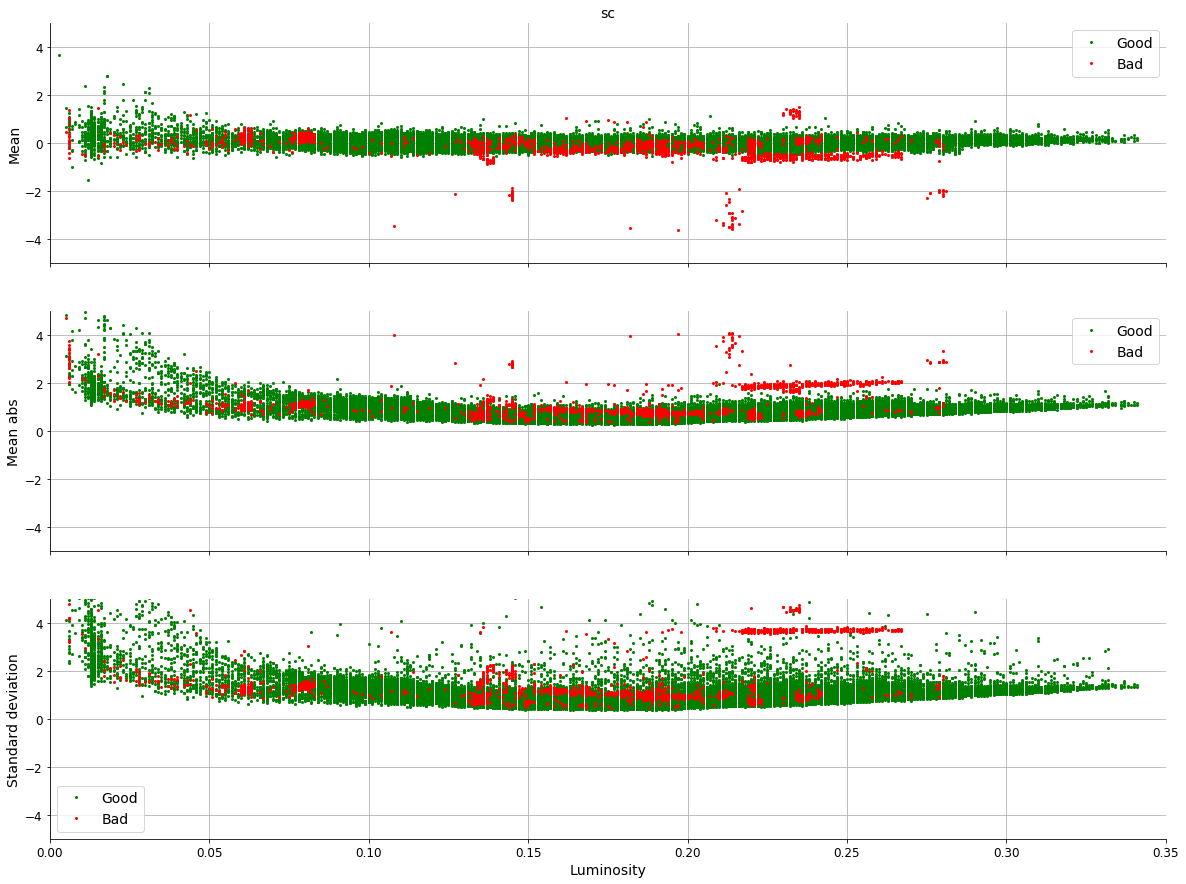

cc


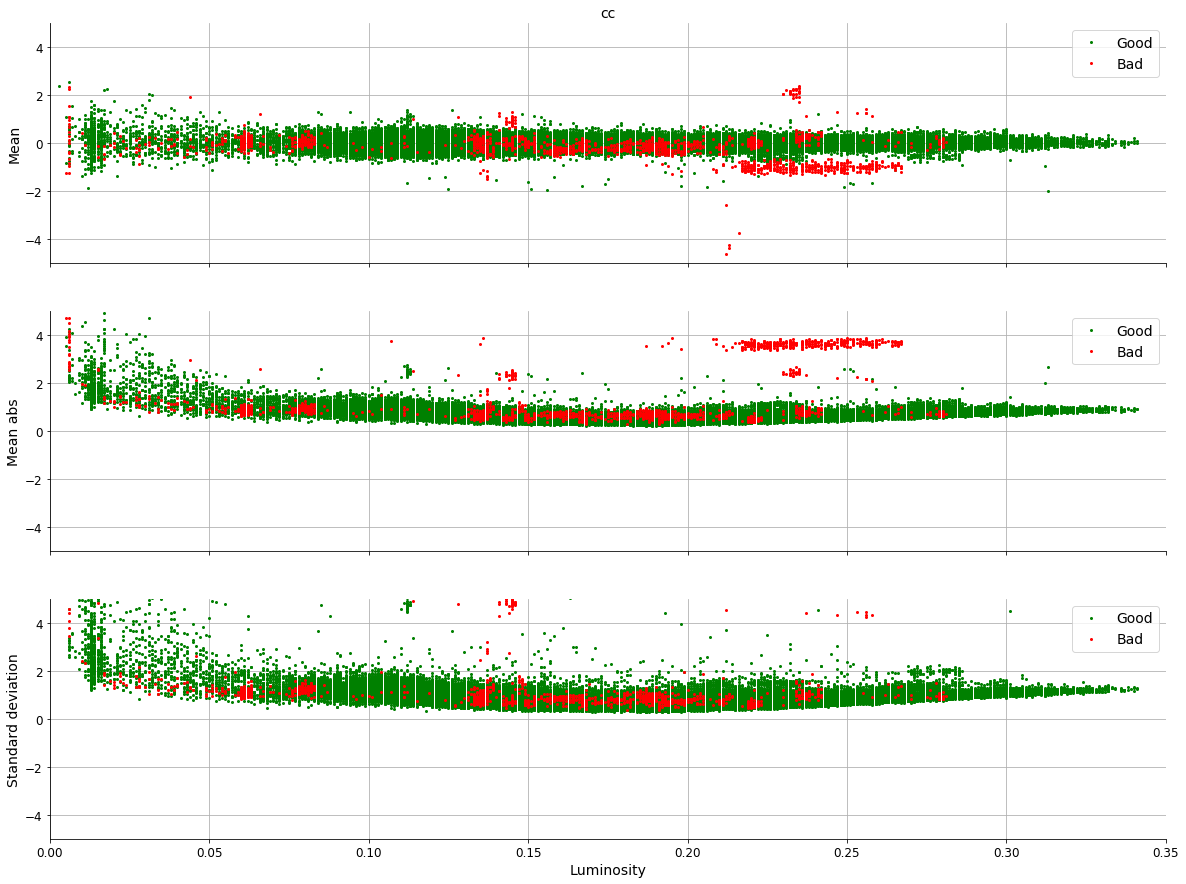

pho2


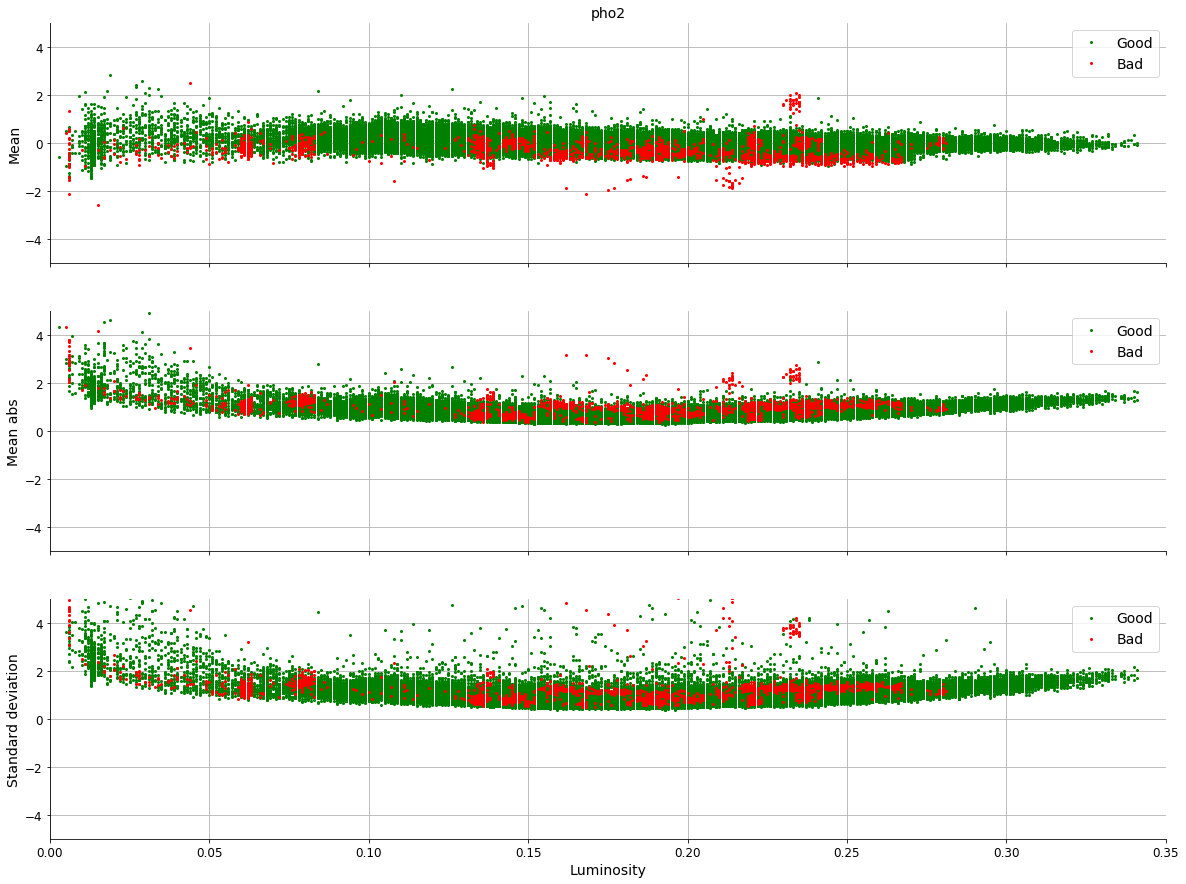

muons2


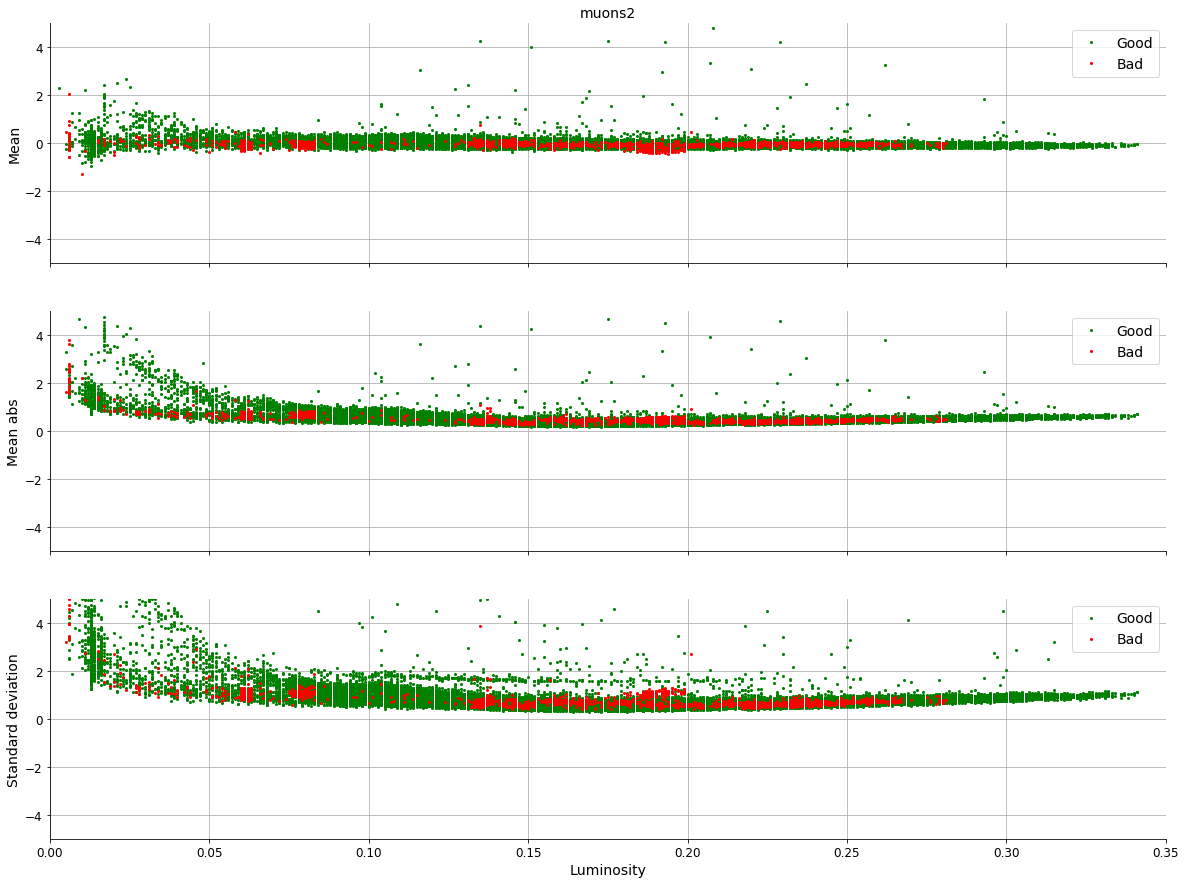

ebs


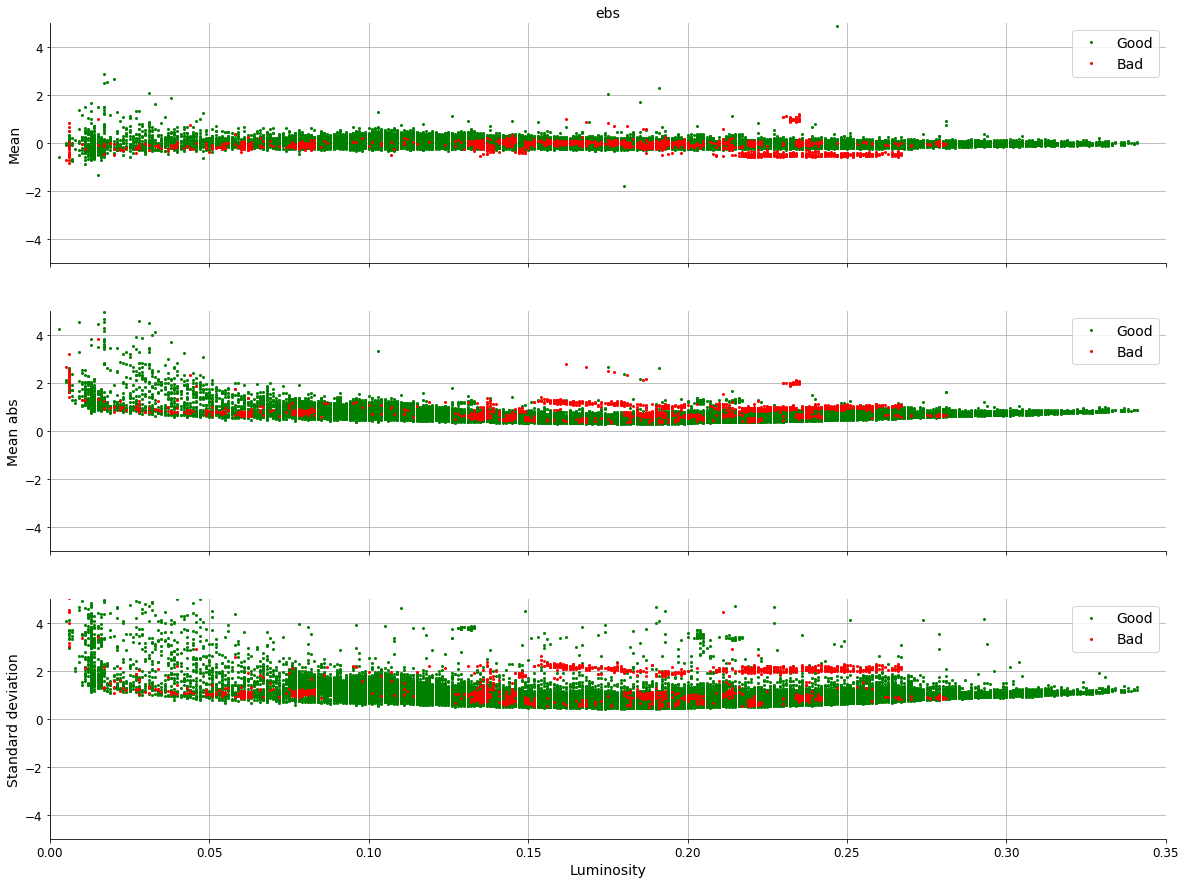

hbhef


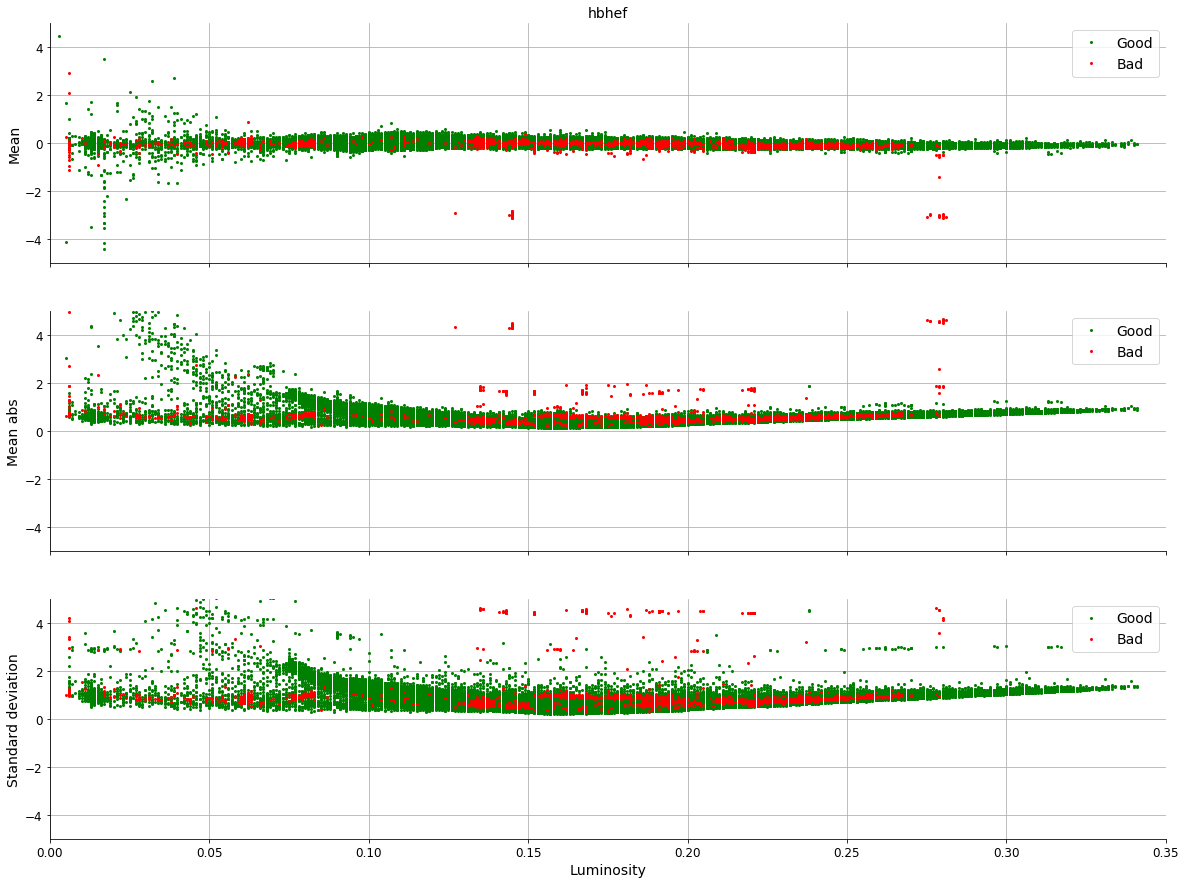

presh


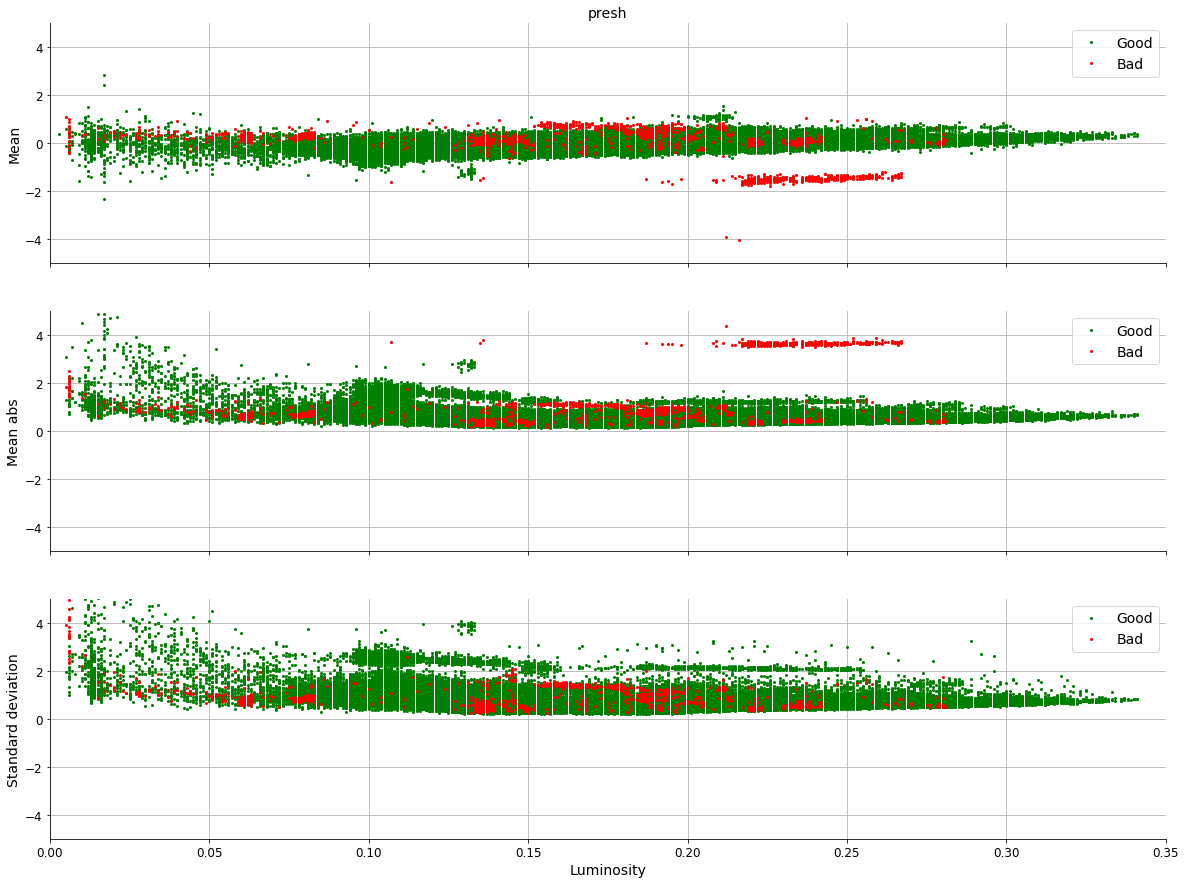

In [40]:
matplotlib.rcParams["figure.figsize"] = (20, 15)
plot_var()

In [37]:
# Plot something over features
def plot_over_features(array, label, y_low=-20, y_high=20):
    features = [i for i in range(array.shape[0])]

    for l in legend:
        plt.plot(features[l["start"]:l["end"]],
                 array[l["start"]:l["end"]],
                 color=l["color"])

    plt.ylabel(label)
    plt.ylim([y_low, y_high])
    plt.xticks([l["start"] for l in legend], [l["name"] for l in legend], rotation='vertical')
    plt.show();

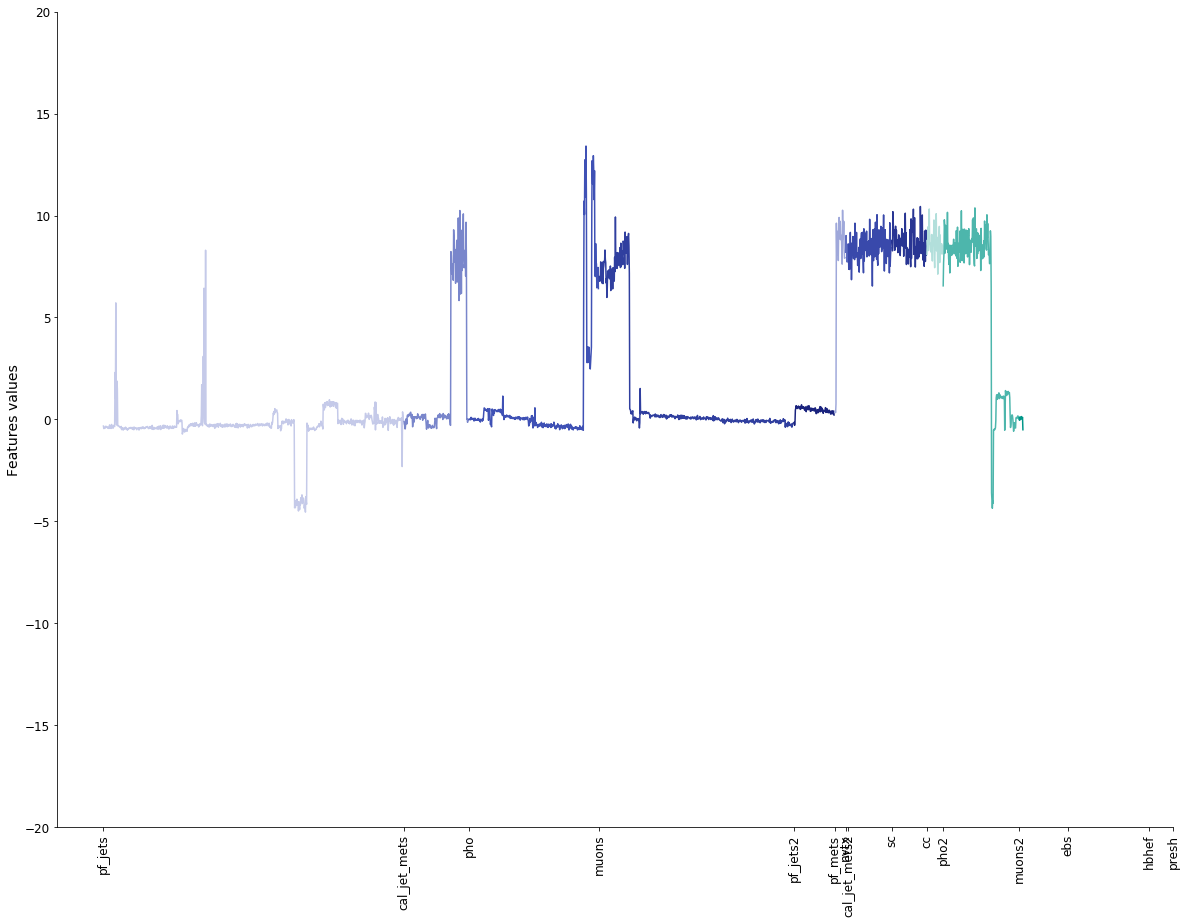

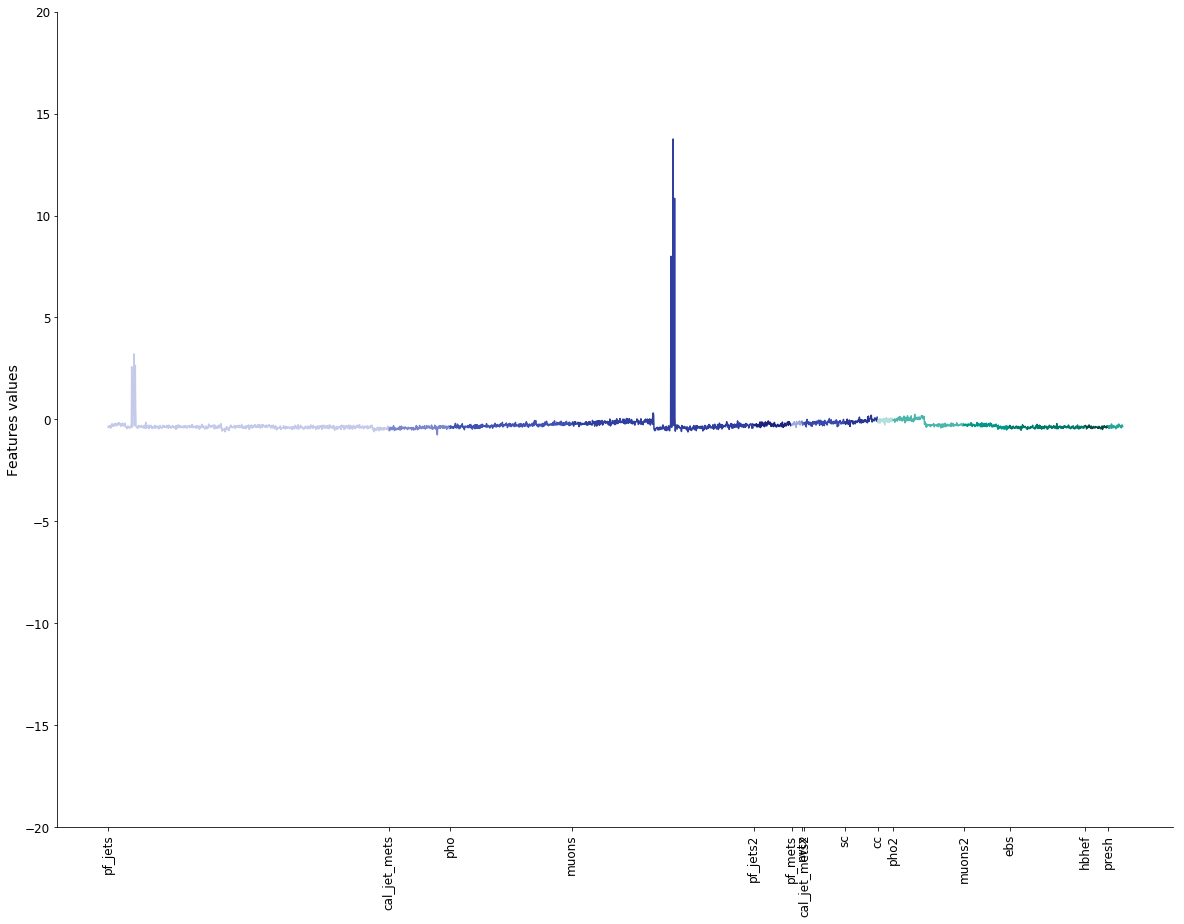

In [38]:
# Choose lumisection
INDEX_GOOD = 0
INDEX_BAD = 0

plot_over_features(X_bad[INDEX_BAD], "Features values")
plot_over_features(X_good[INDEX_GOOD], "Features values")